<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


Install the below libraries


In [41]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab



In [42]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import plotly.express as px

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [43]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


<Figure size 1500x1000 with 0 Axes>

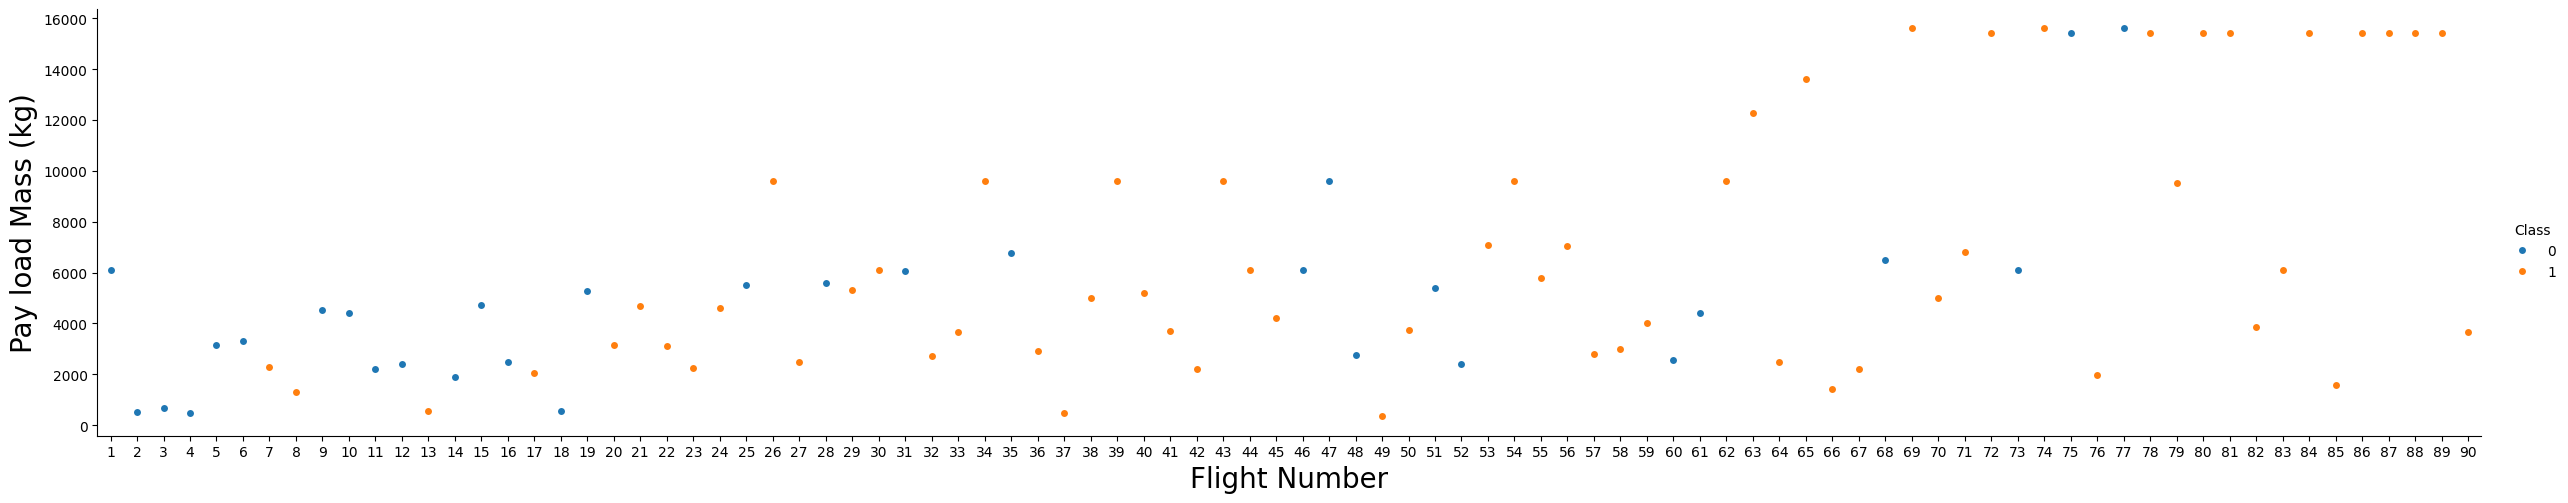

In [44]:
plt.figure(figsize=(15,10))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [45]:
import plotly.express as px

fig = px.scatter(
    df,
    x="FlightNumber",
    y="PayloadMass",
    color="Class",
    title="Payload Mass vs Flight Number by Outcome",
    width=1200,
    height=600, template="gridon"
)

fig.update_layout(
    xaxis_title="Flight Number",
    yaxis_title="Pay load Mass (kg)",
    font=dict(size=16)
)

fig.show()


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [46]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

<Figure size 2000x1500 with 0 Axes>

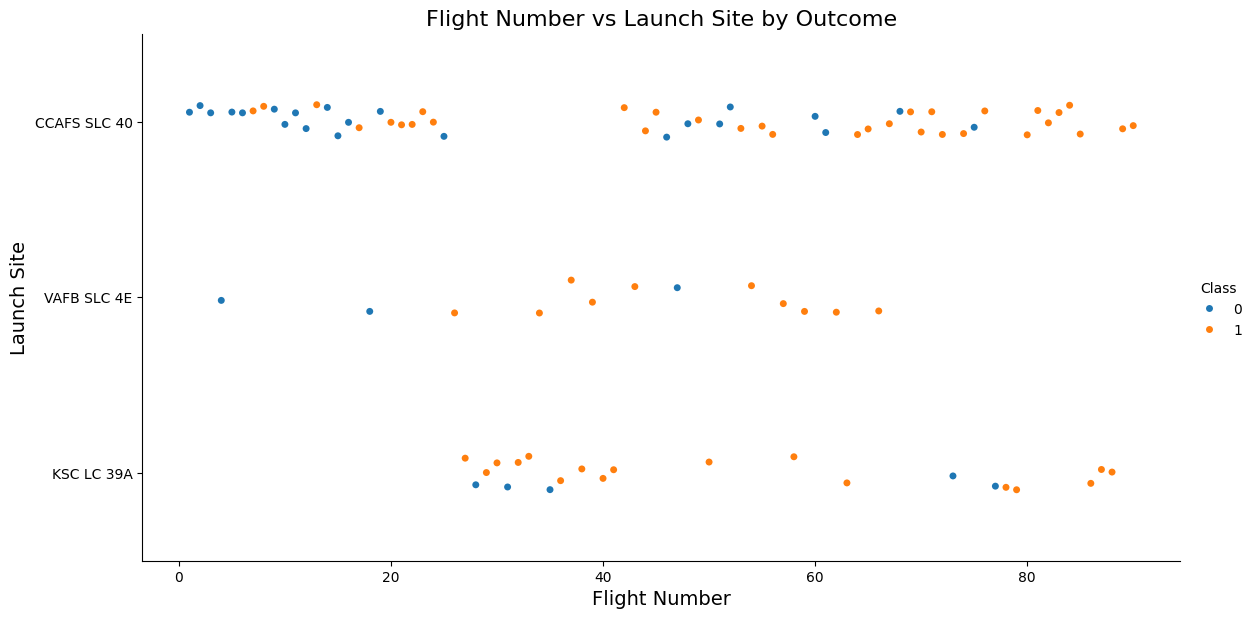

In [47]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(20,15))
sns.catplot(
    data=df,
    x="FlightNumber",             # X-axis: Flight number
    y="LaunchSite",              # Y-axis: Launch site
    hue="Class",                  # Hue: 0 or 1 (failure/success)
    kind="strip",                 # Optional: strip plot (can change to "swarm" or "box" if preferred)
    height=6,
    aspect=2
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site by Outcome", fontsize=16)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


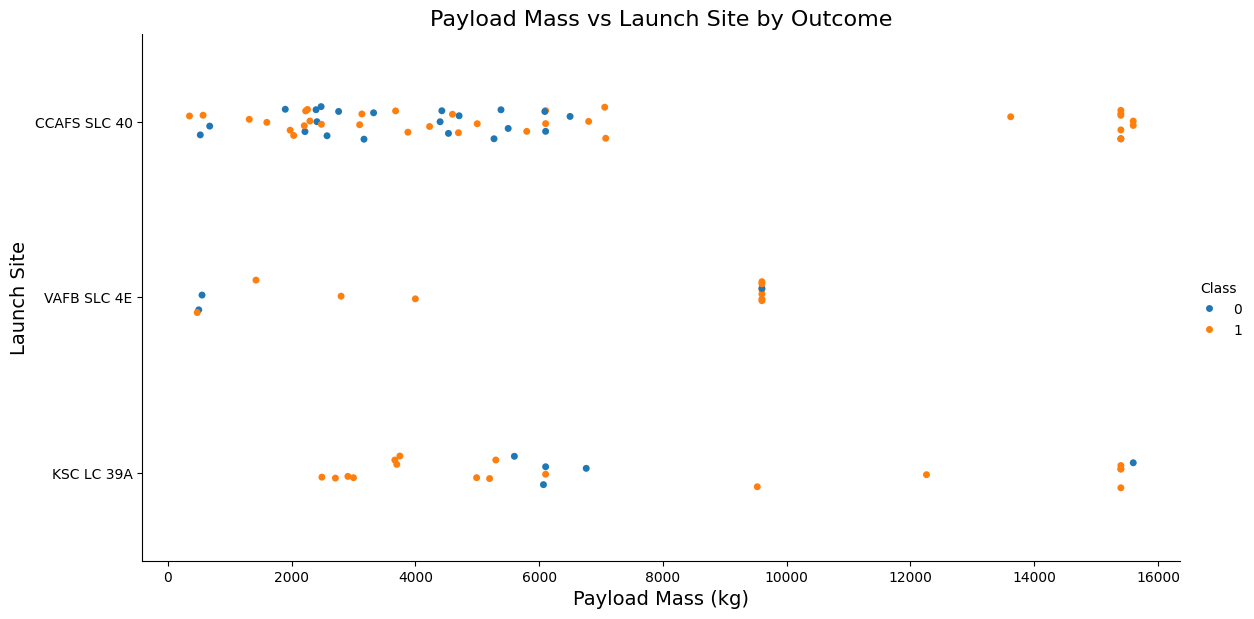

In [48]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    kind="strip",         # Scatter-like plot for categorical y
    height=6,
    aspect=2
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Outcome", fontsize=16)
plt.show()


In [49]:
import plotly.express as px
import pandas as pd

# Sample DataFrame setup (use your real dataset)
# df = pd.read_csv('your_spacex_data.csv')

# Plotly scatter plot with categorical Y-axis
fig = px.strip(
    df,
    x="PayloadMass",           # numeric x-axis
    y="LaunchSite",            # categorical y-axis
    color="Class",             # color by launch outcome
    title="Payload Mass vs Launch Site by Outcome",
    labels={"PayloadMass": "Payload Mass (kg)", "LaunchSite": "Launch Site"},
    height=500,
    stripmode='overlay'        # Optional: 'overlay' or 'group'
)

fig.update_layout(
    xaxis_title="Payload Mass (kg)",
    yaxis_title="Launch Site"
)

fig.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-50-6684c1bda2a4>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




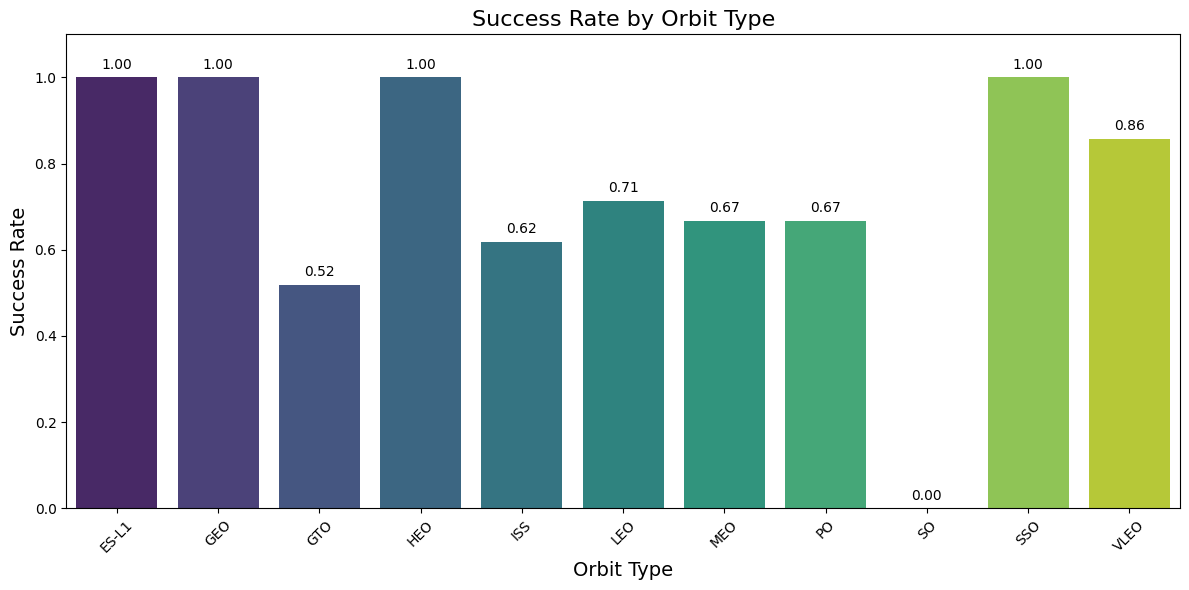

In [50]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Group by Orbit and calculate success rate
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate.rename(columns={"Class": "Success_Rate"}, inplace=True)

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x="Orbit", y="Success_Rate", palette="viridis")

# Add annotations on top of bars
for index, row in orbit_success_rate.iterrows():
    plt.text(index, row["Success_Rate"] + 0.02, f'{row["Success_Rate"]:.2f}', ha='center', fontsize=10)

# Labels and title
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


<ipython-input-51-957e557f4bea>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




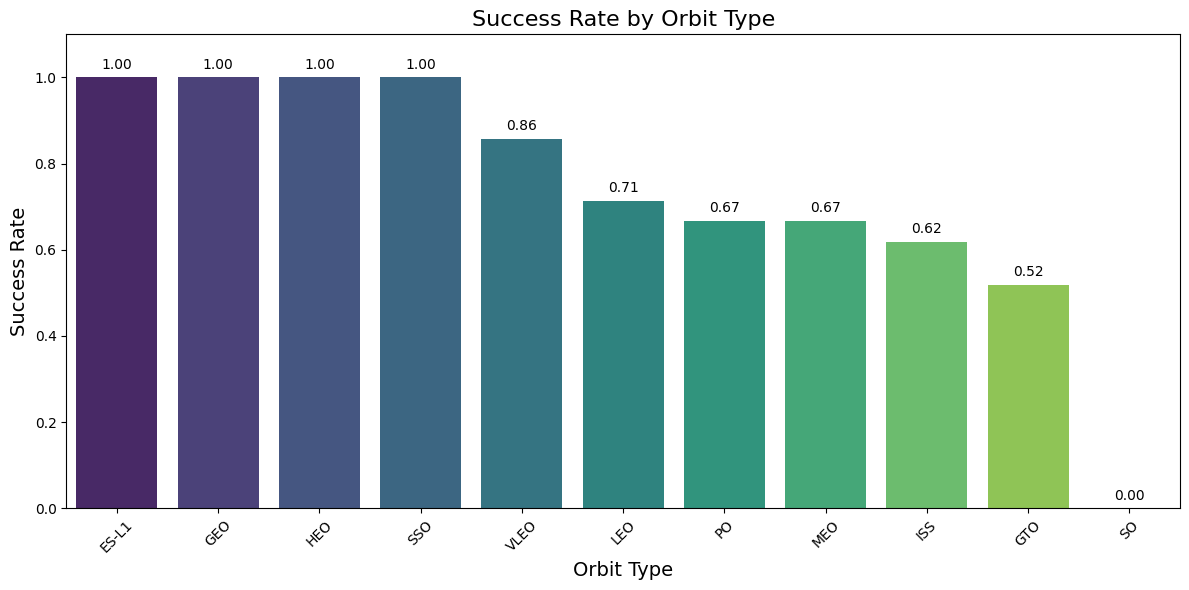

In [51]:
# Group by Orbit and calculate mean success rate
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate.rename(columns={"Class": "Success_Rate"}, inplace=True)

# Sort by success rate descending
orbit_success_rate.sort_values(by="Success_Rate", ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x="Orbit", y="Success_Rate", palette="viridis")

# Add annotations on top of bars
for i, val in enumerate(orbit_success_rate["Success_Rate"]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

# Format plot
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import plotly.express as px

# Group by Orbit and calculate success rate
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate.rename(columns={"Class": "Success_Rate"}, inplace=True)

# Plot the success rate as a bar chart
fig = px.bar(
    orbit_success_rate,
    x="Orbit",
    y="Success_Rate",
    title="Success Rate by Orbit Type",
    labels={"Success_Rate": "Success Rate", "Orbit": "Orbit Type"},
    text_auto=".2f"  # Show success rate values on top of bars
)

fig.update_layout(
    yaxis_tickformat=".0%",      # Format y-axis as percentage
    yaxis_title="Success Rate",
    xaxis_title="Orbit Type"
)

fig.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


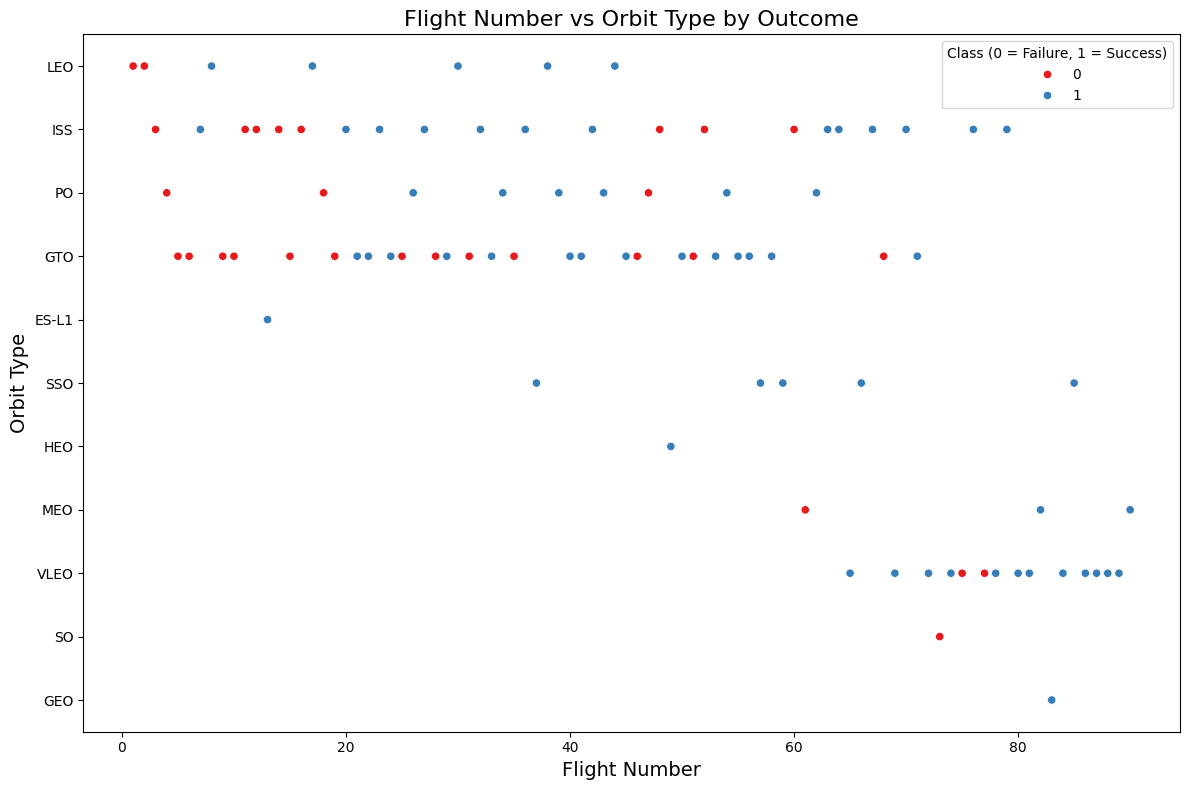

In [53]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    palette="Set1"
)

plt.title("Flight Number vs Orbit Type by Outcome", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.legend(title="Class (0 = Failure, 1 = Success)")
plt.tight_layout()
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


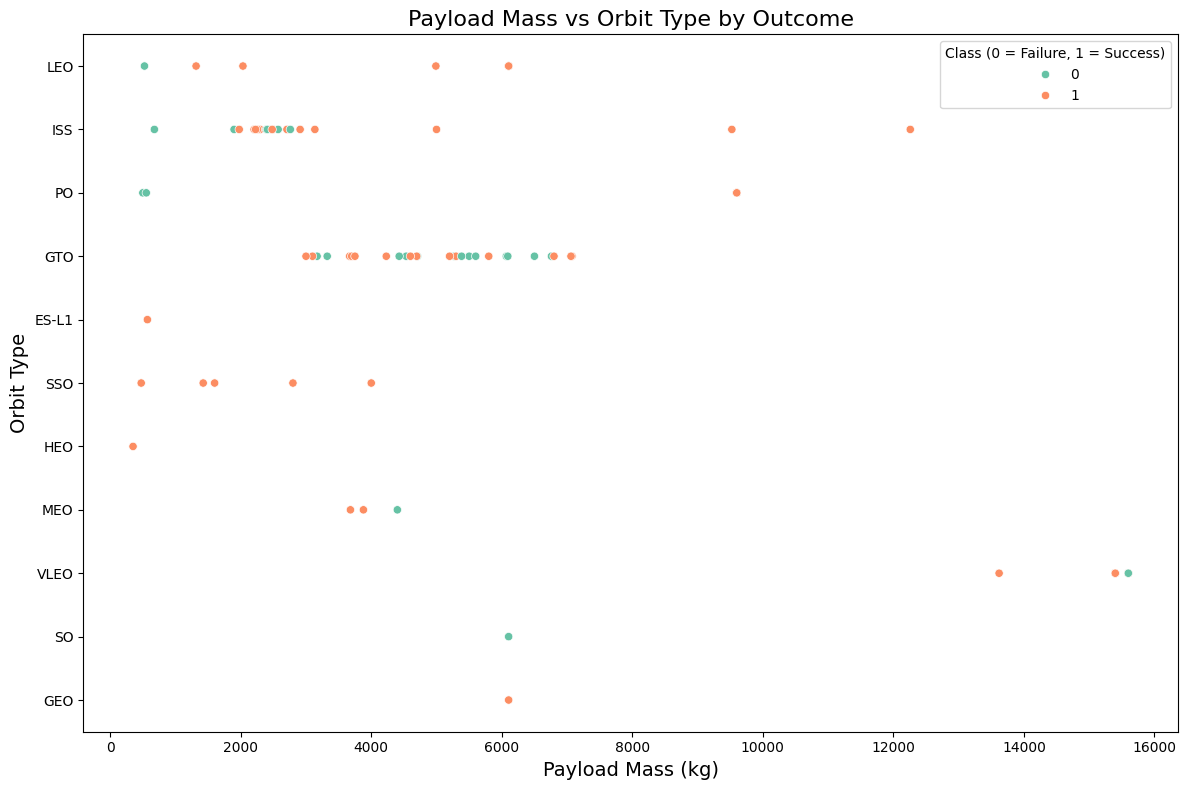

In [54]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    palette="Set2"
)

plt.title("Payload Mass vs Orbit Type by Outcome", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.legend(title="Class (0 = Failure, 1 = Success)")
plt.tight_layout()
plt.show()


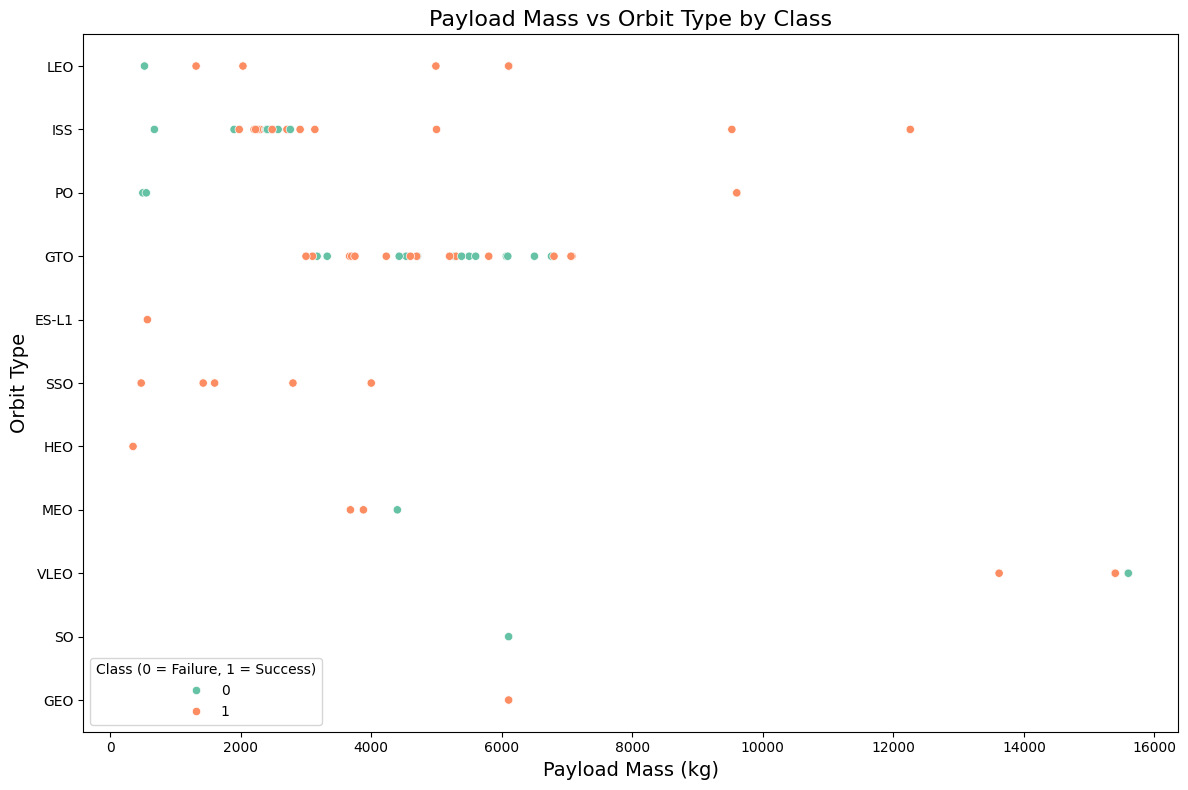

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    palette="Set2"
)

plt.title("Payload Mass vs Orbit Type by Class", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)

# ✅ Position legend in bottom-left corner
plt.legend(
    title="Class (0 = Failure, 1 = Success)",
    loc='lower left',            # position
    bbox_to_anchor=(0, 0)        # fine-tune placement: (x=0, y=0) = bottom-left
)

plt.tight_layout()
plt.show()


In [56]:
import plotly.express as px

fig = px.scatter(
    df,
    x="PayloadMass",
    y="Orbit",
    color="Class",
    title="Payload Mass vs Orbit Type by Outcome",
    labels={"PayloadMass": "Payload Mass (kg)", "Orbit": "Orbit Type"},
    height=500,
    width=1000
)

fig.update_layout(
    xaxis_title="Payload Mass (kg)",
    yaxis_title="Orbit Type",
    legend_title="Class (0 = Failure, 1 = Success)",
    template='plotly_dark',

)

fig.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [57]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [58]:
df["Year"] = Extract_year(df["Date"])
#df["Year"] = df["Date"].str.slice(0, 4)


In [59]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success = df.groupby("Year")["Class"].mean().reset_index()
yearly_success.rename(columns={"Class": "Success_Rate"}, inplace=True)
yearly_success[:5]

,Year,Success_Rate
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


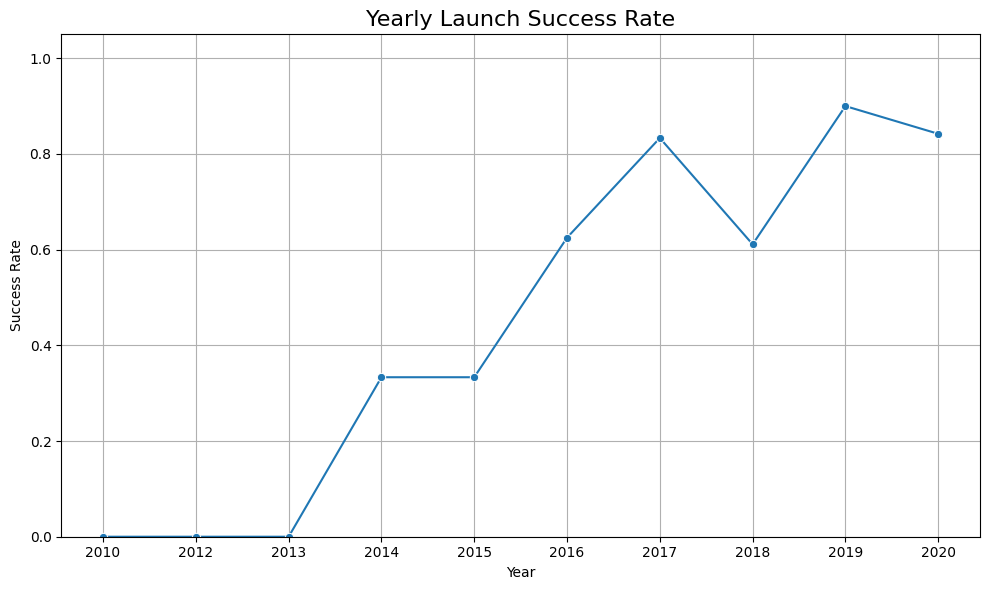

In [60]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success, x="Year", y="Success_Rate", marker="o")
plt.title("Yearly Launch Success Rate", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


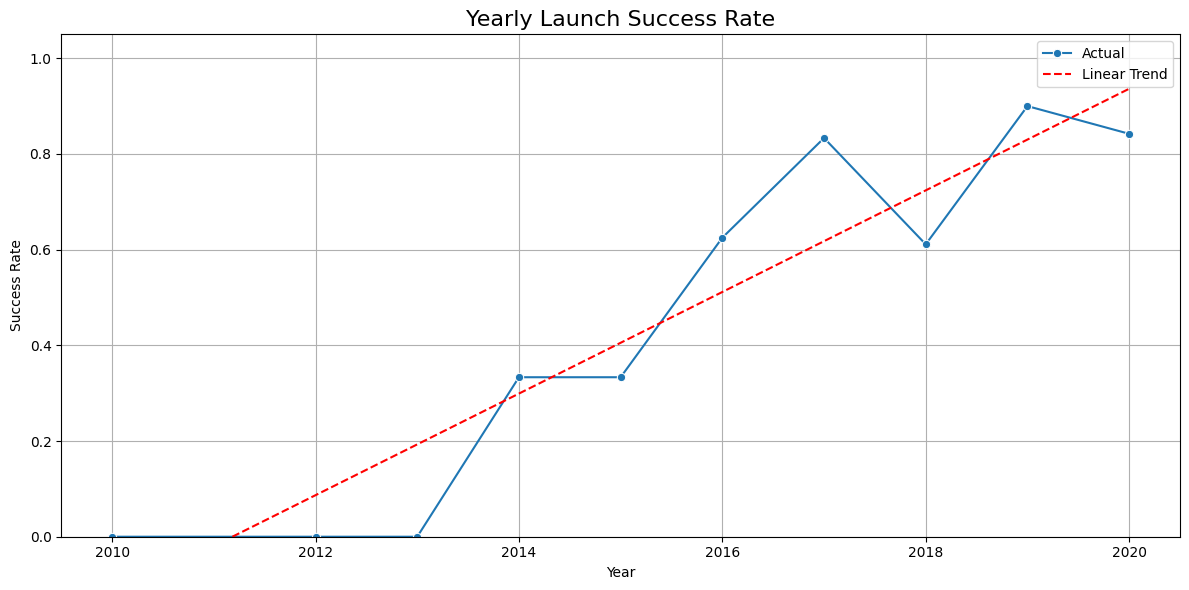

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' to numeric if needed (e.g., from datetime)
x = yearly_success["Year"].astype(int)
y = yearly_success["Success_Rate"]

# Fit linear trend line
slope, intercept = np.polyfit(x, y, 1)
trend = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=x, y=y, marker="o", label="Actual")
plt.plot(x, trend, linestyle="--", color="red", label="Linear Trend")

# Labels and formatting
plt.title("Yearly Launch Success Rate", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
import plotly.express as px

fig = px.line(
    yearly_success,
    x="Year",
    y="Success_Rate",
    markers=True,
    title="Yearly Launch Success Rate",
    labels={"Year": "Year", "Success_Rate": "Success Rate"},
    width=900,
    height=500
)

fig.update_layout(
    yaxis=dict(range=[0, 1.05]),
    template="simple_white",
    title_font=dict(size=18),
    xaxis_title="Year",
    yaxis_title="Success Rate",
    hovermode="x unified"
)

fig.update_traces(line=dict(color="#007ACC", width=3), marker=dict(size=8))
fig.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [63]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [64]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [65]:
print('Legs values:', features.Legs.value_counts())
print('--------')
print('LaunchSite vakues :', features. LaunchSite.value_counts())

Legs values: Legs
True     71
False    19
Name: count, dtype: int64
--------
LaunchSite vakues : LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [66]:
# HINT: Use get_dummies() function on the categorical columns
# Select the original features DataFrame (if not already defined)

'''
# Automatically detect object (categorical) columns
categorical_columns = features.select_dtypes(include='object').columns

# Apply one-hot encoding only to those columns
features_one_hot = pd.get_dummies(features, columns=categorical_columns)

# Display the result
features_one_hot.head()
'''
# Apply One-Hot Encoding to selected categorical columns
features_one_hot = pd.get_dummies(features, columns=["Orbit", "LaunchSite", "LandingPad", "Serial"])

# Display the first few rows
features_one_hot.head()





,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [67]:
# HINT: use astype function
# Cast all numeric columns to float64
features_one_hot = features_one_hot.apply(
    lambda col: col.astype('float64') if pd.api.types.is_numeric_dtype(col) else col
)

# Display to verify
features_one_hot.dtypes.head()


,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [68]:
#features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [69]:
features_one_hot.shape

(90, 80)

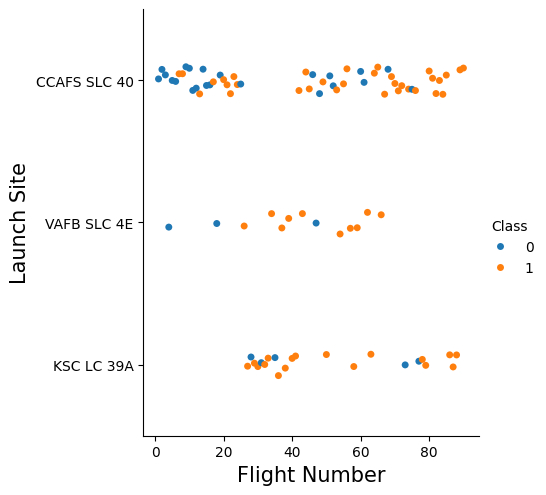

In [70]:
#3.3.Question 3
#The catplot code to show the scatterplot of  FlightNumber vs LaunchSite with x as FlightNumber, and y to Launch Site and hue to 'Class’ is

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 1)

plt.ylabel("Launch Site", fontsize=15)
plt.xlabel("Flight Number", fontsize=15)
plt.show()


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
